# Getting Started 

Jupyter notebooks aimed at learning about google's earth engine and understanding its land monitoring capabilities. We start by setting up the Python client and initializing it so that the client library is populated with methods that the backend server supports. The guide I'm using can be found at https://developers.google.com/earth-engine/guides

If you are new to earth observation, like me, then maybe my parallel exploration of the more conceptual rather than programatic side may also prove useful. It can be found in the 'understanding_concepts' document in the https://github.com/nsushant/Exploring_Earth_observation.git repo. 

In [1]:
import ee

In [2]:
%%capture captured_output
ee.Authenticate()

Enter verification code: 4/1AfJohXnNmh_z6v14P5r3vXjn-X6KpM9xrpf2shnqgmPPCChKHfzM63v5xn4


In [3]:
ee.Initialize()

Dates in ee or earth engine can be converted from 'YYYY-MM-DD' to milliseconds using ee.date('YYYY-MM-DD'). Thereafter the python datetime module is used to convert from an ee.Date object to a python datetime object. 

In [4]:
import datetime

In [5]:
def convert_ee_to_datetime(YYYY_MM_DD):
    if (type(YYYY_MM_DD) != str): 
        print("Input must be a string of form YYYY-MM-DD")
        print("you have currently provided input of type " + str(type(YYYY_MM_DD)))
        
    ee_date = ee.Date(YYYY_MM_DD)
    py_date = datetime.datetime.utcfromtimestamp(ee_date.getInfo()['value']/1000.0)
    return py_date 

In [6]:
def convert_datetime_to_ee(py_date):
    if (type(YYYY_MM_DD) != str): 
        print("Input must be a string of form YYYY-MM-DD") 
        print("you have currently provided input of type " + str(type(py_date)))
    ee_date = ee.Date(py_date)
    return ee_date

## Loading-in Images

Now for some images. Raster data is represented in earth engine through Image objects. 

But what is a raster image ? The AI generated response below explains this concept well. 

A raster image is a type of digital image that is composed of a grid or matrix of pixels, where each pixel represents a discrete value or color. In contrast to vector graphics, which are based on mathematical equations to represent shapes, raster images are based on a grid of individual picture elements.

Key characteristics of raster images include:

Pixels: The basic building blocks of a raster image are pixels, which are small square or rectangular elements arranged in a grid. Each pixel contains information about the color or intensity of the image at that specific location.

Resolution: The resolution of a raster image is determined by the number of pixels in the horizontal and vertical dimensions. Higher resolution images have more pixels and can represent more detail, but they also require more storage space and processing power.

Color Depth: Raster images can be grayscale (one channel), or they can have multiple color channels (e.g., red, green, and blue for a color image). The number of bits used to represent each pixel's color value determines the color depth and the range of colors that can be represented.

File Formats: Common file formats for raster images include JPEG, PNG, TIFF, and BMP. Each format has its own characteristics and is suitable for different types of images and applications.
Photographic Realism: Raster images are well-suited for representing photographic and continuous-tone images, such as photographs and detailed graphics. They are not as well-suited for representing sharp, scalable shapes, which is a strength of vector graphics.


These images are particularly effective at representing complex scenes with continuous tones and intricate details. However, raster images can suffer from pixelation when enlarged, and their file sizes can become large, especially at high resolutions.

the string input 'JAXA/ALOS/AW3D30/V2_2' is the asset ID for an image, we can obtain this id from the data catalogue available at https://developers.google.com/earth-engine/datasets

In [7]:
# img.getInfo() will fetch the meta-data and convert it to a python dict 
# img will print instructions to access/retrieve the image directly 

img = ee.Image('JAXA/ALOS/AW3D30/V2_2')

To view images we use geemap. Basically geemap's 'map' object contains a map of the Earth, the code below allows us to look at an image added from earth engine as a layer on that 'map' object.

In [8]:
import geemap.core as geemap

In [ ]:
#!jupyter nbextension enable --py widgetsnbextension

In [9]:
%matplotlib notebook

# Initialize a map object.
m = geemap.Map()

# Add the image to the map.
m.add_layer(img, None, 'Random image')

# Display the map (you can call the object directly if it is the final line).
display(m)

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

# Geometry Objects



Geometry objects basically allow you to handle vectors in earth engine, like coordinates or lists. These objects can be of the following types - 

list taken from docs at https://developers.google.com/earth-engine/guides/geometries

Point (a list of coordinates in some projection) 

LineString (a list of points) 

LinearRing (a closed LineString)

Polygon (a list of LinearRings where the first is a shell and subsequent rings are holes). 

Earth Engine also supports MultiPoint, MultiLineString, and MultiPolygon

## Geodesic Geometries

since the earth is closer to a sphere in its shape than a falt sheet of paper (or more specifically a 2D plane), there is no good way to accurately represent the features of our globe with a flat or 'planar'/Euclidean coordinate system. But how do you work within a non-euclidean coordinate system that is - suppose - spherical ?  

Well straight lines are the shortest paths between points on a flat 2D plane. But on a sphere, the paths between two points take the form of curve. A 'geodesic' is basically the shortest curve between two points. 

See fig 1. at https://developers.google.com/earth-engine/guides/geometries_planar_geodesic to see the difference. Now, earth engine by default uses this non-euclidean coordinate system where we use curves to represent shortest distances. 

On the Earth this coordinate system of curves is found in the form of longitudes and latitudes. Latitudes measure how far north or south of the Equator you are (so they are curves that run horizontally along the surface of a globe). Longitudes are measurements of how far east or west you are of the prime meridian at Greenwich (shortest curves between the north and south poles). 

# Putting it all together with collections 

We can also load images in from collections. The snippet below is from the Sentinel-2 MSI: MultiSpectral Instrument, Level-2A. More details available at https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR.

The most efficient way to get images out of a collection is to use filters (applied in order of decreasing specificity - specific region then date, etc.)

In [12]:
# latitude = 18.516726, longitude = 73.856255 -> coords for Pune, Maharashtra, India.
# ee.ImageCollection('COPERNICUS/S2_SR') simply loads the collection in, 
# The filters here go from exact coordinates -> dates -> some less specific filters 

# Geometry.Point objects take input coordinates in the form of (longitude, latitude)
first = (
    ee.ImageCollection('COPERNICUS/S2_SR')
    .filterBounds(ee.Geometry.Point(73.8357,18.5442))
    .filterDate('2020-01-01', '2020-12-31')
    .sort('CLOUDY_PIXEL_PERCENTAGE')
    .first()
)

# Define a map centered on Pune, Maharashtra, India.
# here first number is the latitude, and the second number is the longitude. so center = (latitude,longitude)
m = geemap.Map(center=[18.5442,73.8357], zoom=11)

# Add the image layer to the map and display it.
m.add_layer(
    first, {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 2000}, 'first'
)
display(m)

Map(center=[18.5442, 73.8357], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

In [23]:
# mumbai is at 19.0760° N, 72.8777° E


first = (
    ee.ImageCollection('COPERNICUS/S2_SR')
    .filterBounds(ee.Geometry.Point(73,19))
    .filterDate('2020-01-01', '2020-12-31')
    .sort('CLOUDY_PIXEL_PERCENTAGE')
    .first()
)

# Define a map centered on Pune, Maharashtra, India.
# here first number is the latitude, and the second number is the longitude. so center = (latitude,longitude)
m = geemap.Map(center=[19,73], zoom=11)

# Add the image layer to the map and display it.
m.add_layer(
    first, {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 2000}, 'first'
)
display(m)


Map(center=[19, 73], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

# Looking at elevation and temperature maps 


In [13]:
# Import the MODIS land cover collection. 
#(https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MCD12Q1#description)
# newer version is MCD12Q1.061 MODIS 


lc = ee.ImageCollection('MODIS/006/MCD12Q1')
#ee.ImageCollection('MODIS/061/MCD12Q1') 

# Import the MODIS land surface temperature collection.
# for newer version use ee.ImageCollection("MODIS/061/MOD11A1")
#(https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MOD11A1)

#LST_Day_1km: Daytime Land Surface Temperature
#LST_Night_1km: Nighttime Land Surface Temperature
# values in Kelvin in range 7,500 to 65,535  

lst = ee.ImageCollection('MODIS/006/MOD11A1')


# Import the USGS ground elevation image.
#(https://developers.google.com/earth-engine/datasets/catalog/USGS_SRTMGL1_003)


elv = ee.Image('USGS/SRTMGL1_003')

In [14]:
# Initial date of interest (inclusive).
i_date = '2017-01-01'

# Final date of interest (exclusive).
f_date = '2020-01-01'

# Selection of appropriate bands and dates for LST.
lst = lst.select('LST_Day_1km', 'QC_Day').filterDate(i_date, f_date)

In [15]:
lst_img = lst.mean()
lst_img = lst_img.select('LST_Day_1km').multiply(0.02)
lst_img = lst_img.select('LST_Day_1km').add(-273.15)

In [16]:
from IPython.display import Image

geo_Pune = ee.Geometry.Point(73.8567,18.5204)

roi = geo_Pune.buffer(1e6)

# Create a URL to the styled image for a region around Pune.
url = lst_img.getThumbUrl({
    'min': 25, 'max': 45, 'dimensions': 512, 'region': roi,
    'palette': ['blue', 'yellow', 'orange', 'red']})

print(url)

# Display the thumbnail land surface temperature in Pune.
print('\nPlease wait while the thumbnail loads, it may take a moment...')
Image(url=url)

https://earthengine.googleapis.com/v1/projects/earthengine-legacy/thumbnails/fd3cf2dc40d268996b8dcbef9bd0b1f9-d43a19823026d06f0769ff60c1a63d6b:getPixels

Please wait while the thumbnail loads, it may take a moment...


In [146]:
elv_img = elv.updateMask(elv.gt(0))

roi = geo_Pune.buffer(1e6)

Image(url=elv_img.getThumbURL({
    'min': 0, 'max': 2000, 'dimensions': 512, 'region': roi,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}))

<IPython.core.display.Javascript object>


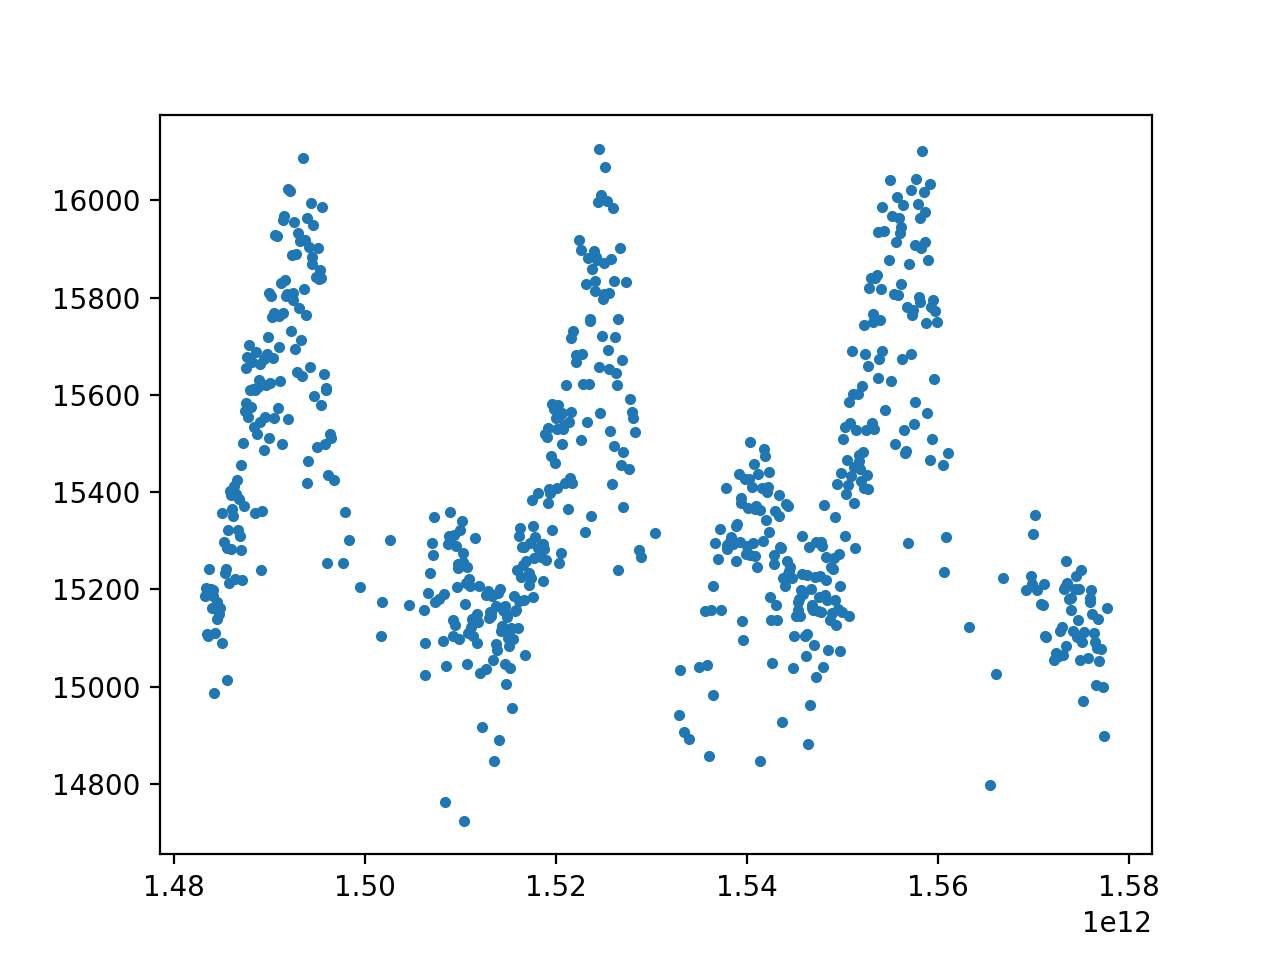

In [140]:
import matplotlib.pyplot as plt 
import pandas as pd 

df = pd.DataFrame(lst.getRegion(geo_Pune, 10000).getInfo(),columns = lst.getRegion(geo_Pune, 10000).getInfo()[0])

df = df.drop([0])

plt.plot(df['time'],df['LST_Day_1km'],'.')